### 문제


In [2]:
! # 시작시간 체크

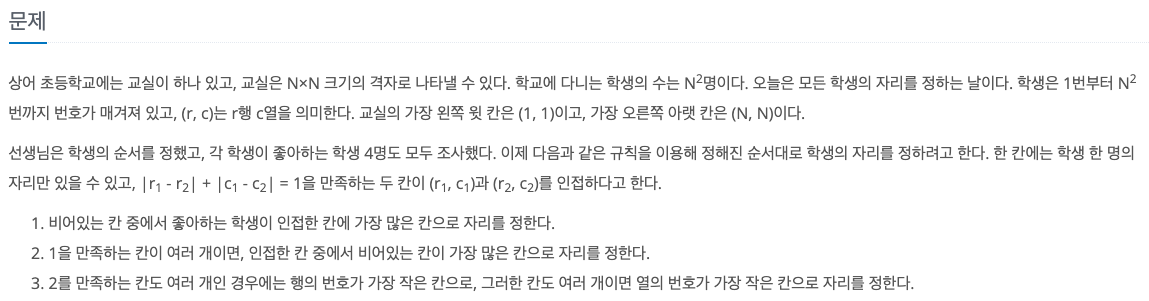

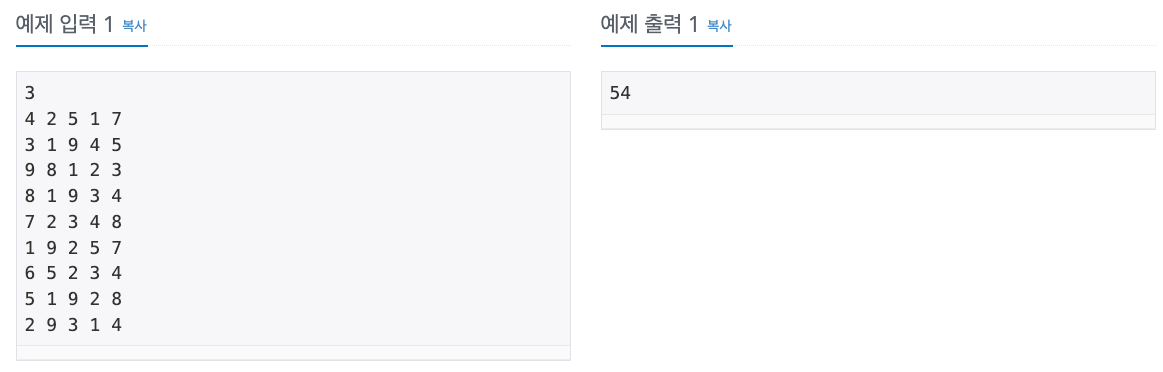

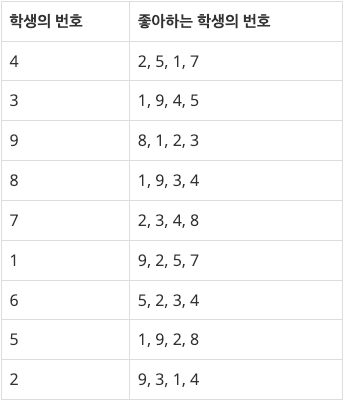

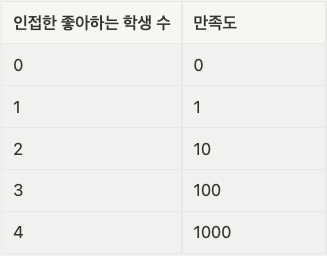

In [3]:
! # 끝 시간 체크

### 풀이

In [ ]:
from collections import defaultdict
N=int(input())
s_li = [list(map(int,input().split())) for _ in range(N**2)]
seat = [[0]*N for _ in range(N)]
candidate = [[[-1, -1, i, j] for j in range(N)] for i in range(N)] # 3 x 3 x 4 / 자리별 후보 정보
like_dict=defaultdict(list)
result=0 # 출력 결과 초기화
dr = [-1, 1, 0, 0]
dc = [0, 0, -1, 1]

def get_seat_info(r, c, s):
    like_cnt=empty_cnt=0
    for i in range(4):
        nr = r+dr[i]; nc = c+dc[i]
        if 0 <= nr < N and 0 <= nc < N:
            if seat[nr][nc] in s[1:]: # 인접한 자리에 좋아하는 친구 있다면
                like_cnt+=1
            elif seat[nr][nc] == 0: # 인접한 자리가 빈자리라면
                empty_cnt+=1
    return [like_cnt, empty_cnt, r, c]   

for s in s_li: # 학생별
    for r in range(N): # 행
        for c in range(N): # 열
            candidate[r][c] = [-1, -1, r, c] # 후보 정보 초기화
            if seat[r][c] == 0:
                candidate[r][c] = get_seat_info(r, c, s) # 해당자리의 정보 얻기
    candidate_list = sum(candidate,[]) # 3차원을 2차원으로
    best_seat = sorted(candidate_list, key=lambda x:(-x[0], -x[1], x[2], x[3]))[0]
    seat[best_seat[2]][best_seat[3]] = s[0]

for s in s_li:
    like_dict[s[0]]=s[1:]

for r in range(N):
    for c in range(N):
        like_list = like_dict[seat[r][c]] # 선호하는 학생 리스트
        like_cnt=0
        for i in range(4):
            nr = r+dr[i]; nc = c+dc[i]
            if 0<=nr<N and 0<=nc<N and seat[nr][nc] in like_list:
                like_cnt+=1
        result+=10 ** (like_cnt-1) if like_cnt>0 else 0        
print(result)

### 제출용

In [ ]:
import sys
from collections import defaultdict
input=sys.stdin.readline
N=int(input())
s_li = [list(map(int,input().split())) for _ in range(N**2)]
seat = [[0]*N for _ in range(N)]
candidate = [[[-1, -1, i, j] for j in range(N)] for i in range(N)] # 3 x 3 x 4 / 자리별 후보 정보
like_dict=defaultdict(list)

dr = [-1, 1, 0, 0]
dc = [0, 0, -1, 1]

def get_seat_info(r, c, s):
    like_cnt=empty_cnt=0
    for i in range(4):
        nr = r+dr[i]; nc = c+dc[i]
        if 0 <= nr < N and 0 <= nc < N:
            if seat[nr][nc] in s[1:]: # 인접한 자리에 좋아하는 친구 있다면
                like_cnt+=1
            elif seat[nr][nc] == 0: # 인접한 자리가 빈자리라면
                empty_cnt+=1
    return [like_cnt, empty_cnt, r, c]   

for s in s_li: # 학생별
    for r in range(N): # 행
        for c in range(N): # 열
            candidate[r][c] = [-1, -1, r, c] # 후보 정보 초기화
            if seat[r][c] == 0:
                candidate[r][c] = get_seat_info(r, c, s) # 해당자리의 정보 얻기
    candidate_list = sum(candidate,[]) # 3차원을 2차원으로
    best_seat = sorted(candidate_list, key=lambda x:(-x[0], -x[1], x[2], x[3]))[0]
    seat[best_seat[2]][best_seat[3]] = s[0]

for s in s_li:
    like_dict[s[0]]=s[1:]
result=0
for r in range(N):
    for c in range(N):
        like_list = like_dict[seat[r][c]] # 선호하는 학생 리스트
        like_cnt=0
        for i in range(4):
            nr = r+dr[i]; nc = c+dc[i]
            if 0<=nr<N and 0<=nc<N and seat[nr][nc] in like_list:
                like_cnt+=1
        result+=10 ** (like_cnt-1) if like_cnt>0 else 0        
print(result)

### 주석 달린 풀이

### 연습

    상상풀이
    각 좌석을 인덱스로 인접한 좌석 4개를 서브리스트로 갖는 이중리스트 생성 -> s_li
    NxN 크기의 학생 좌석 수 이중 리스트 생성 -> seat
    만족도 계산할 default dict(list) 생성 -> like_dict
    s_li를 반복하며 seat의 적절한 곳에 앉히기
        한 학생에 대해, 각 칸을 돌며, 칸 별로 아래를 게산한 리스트를 생성 - candidate
        get_seat_info 함수
            1. 인접한 칸에 좋아하는 학생 수
            2. 인접한 칸에 비어있는 칸 개수
            3. 행의 번호, 열의 번호
        candidate를 1차원 풀어서 리스트로 생성 candidate_list    
        candidate_list를 정렬해서, 가장 우선인 자리 best_seat 찾아서 앉히기, 다음 학생에 대해 위 과정 반복
        -> seat에 학생들이 채워졌다.
    N*N for문으로 반복하며 각 seat 별로 인접한 위치 보고 만족도 계산 -> like_cnt -> result에 점수 저장

In [85]:
N=3

In [98]:
[[[-1,1,i,j] for j in range(N)] for i in range(N)]

[[[-1, 1, 0, 0], [-1, 1, 0, 1], [-1, 1, 0, 2]],
 [[-1, 1, 1, 0], [-1, 1, 1, 1], [-1, 1, 1, 2]],
 [[-1, 1, 2, 0], [-1, 1, 2, 1], [-1, 1, 2, 2]]]

### 안보고 풀어보기

In [107]:
import sys
from collections import defaultdict
input = sys.stdin.readline
N=int(input())
s_li=[list(map(int,input().split())) for _ in range(N*N)]
seat=[[0]*N for _ in range(N)]
candidate=[[[] for j in range(N)] for i in range(N)] 
like_dict=defaultdict(list)
result=0
dr=[1,-1,0,0]
dc=[0,0,-1,1]

def get_seat_info(r,c,s):
    like_cnt=empty_cnt=0
    for i in range(4):
        nr=r+dr[i]
        nc=c+dc[i]
        if 0<=nr<N and 0<=nc<N:
            if seat[nr][nc] in s[1:]:
                like_cnt+=1
            elif seat[nr][nc]==0:
                empty_cnt+=1
    return [like_cnt, empty_cnt, r, c]

for s in s_li:
    for r in range(N):
        for c in range(N):
            # candidate 각 리스트(4개원소)의 의미: 인접칸에 대해 좋아하는 학생 수, 빈 칸 개수, 행 번호, 열 번호
            candidate[r][c] = [-1,-1,r,c] # 초기화
            if seat[r][c]==0:
                candidate[r][c] = get_seat_info(r,c,s)
    candidate_list = sum(candidate, []) # 1차원 축소
    best = sorted(candidate_list, key=lambda x: (-x[0], -x[1], x[2], x[3]) )[0] # 좋아하는 학생 수, 빈 칸 수 내림차순, 행, 열 오름차순
    seat[best[2]][best[3]] = s[0] # best에 s[0]이 앉음

for s in s_li:
    like_dict[s[0]] = s[1:]

for r in range(N):
    for c in range(N):
        like_cnt=0
        for i in range(4):
            nr=r+dr[i]
            nc=c+dc[i]
            if 0<=nr<N and 0<=nc<N and seat[nr][nc] in like_dict[seat[r][c]]:
                like_cnt+=1
        result+= 10 ** (like_cnt-1) if like_cnt > 0 else 0

print(result)

54


In [99]:
N=3

l = """4 2 5 1 7
3 1 9 4 5
9 8 1 2 3
8 1 9 3 4
7 2 3 4 8
1 9 2 5 7
6 5 2 3 4
5 1 9 2 8
2 9 3 1 4""".split('\n')
s_li = [list(map(int,i.split())) for i in l]

In [83]:
N=3

l = """4 2 5 1 7
2 1 9 4 5
5 8 1 4 3
1 2 9 3 4
7 2 3 4 8
9 8 4 5 7
6 5 2 3 4
8 4 9 2 1
3 9 2 1 4""".split('\n')

In [84]:
s_li = [list(map(int,i.split())) for i in l]
seat = [[0]*N for _ in range(N)]
candidate = [[[-1, -1, i, j] for j in range(N)] for i in range(N)] # 3 x 3 x 4 / 자리별 후보 정보
like_dict=defaultdict(list)

dr = [-1, 1, 0, 0]
dc = [0, 0, -1, 1]

def get_seat_info(r, c, s):
    like_cnt=empty_cnt=0
    for i in range(4):
        nr = r+dr[i]; nc = c+dc[i]
        if 0 <= nr < N and 0 <= nc < N:
            if seat[nr][nc] in s[1:]: # 인접한 자리에 좋아하는 친구 있다면
                like_cnt+=1
            elif seat[nr][nc] == 0: # 인접한 자리가 빈자리라면
                empty_cnt+=1
    return [like_cnt, empty_cnt, r, c]   

for s in s_li: # 학생별
    for r in range(N): # 행
        for c in range(N): # 열
            candidate[r][c] = [-1, -1, r, c] # 후보 정보 초기화
            if seat[r][c] == 0:
                candidate[r][c] = get_seat_info(r, c, s) # 해당자리의 정보 얻기
    candidate_list = sum(candidate,[]) # 3차원을 2차원으로
    best_seat = sorted(candidate_list, key=lambda x:(-x[0], -x[1], x[2], x[3]))[0]
    seat[best_seat[2]][best_seat[3]] = s[0]

for s in s_li:
    like_dict[s[0]]=s[1:]
result=0
for r in range(N):
    for c in range(N):
        like_list = like_dict[seat[r][c]] # 선호하는 학생 리스트
        like_cnt=0
        for i in range(4):
            nr = r+dr[i]; nc = c+dc[i]
            if 0<=nr<N and 0<=nc<N and seat[nr][nc] in like_list:
                like_cnt+=1
        result+=10 ** (like_cnt-1) if like_cnt>0 else 0        
print(result)

1053


In [12]:
s_li = [list(map(int,i.split())) for i in l]

In [17]:
s_li

[[4, 2, 5, 1, 7],
 [3, 1, 9, 4, 5],
 [9, 8, 1, 2, 3],
 [8, 1, 9, 3, 4],
 [7, 2, 3, 4, 8],
 [1, 9, 2, 5, 7],
 [6, 5, 2, 3, 4],
 [5, 1, 9, 2, 8],
 [2, 9, 3, 1, 4]]

In [73]:
seat = [[0]*N for _ in range(N)]
candidate = [[[-1, -1, i, j] for j in range(N)] for i in range(N)] # 3 x 3 x 4 / 자리별 후보 정보
dr = [-1, 1, 0, 0]
dc = [0, 0, -1, 1]

def get_seat_info(r, c, s):
    like_cnt=empty_cnt=0
    for i in range(4):
        nr = r+dr[i]; nc = c+dc[i]
        if 0 <= nr < N and 0 <= nc < N:
            if seat[nr][nc] in s[1:]: # 인접한 자리에 좋아하는 친구 있다면
                like_cnt+=1
            elif seat[nr][nc] == 0: # 인접한 자리가 빈자리라면
                empty_cnt+=1
    return [like_cnt, empty_cnt, r, c]   

for s in s_li: # 학생별
    for r in range(N): # 행
        for c in range(N): # 열
            candidate[r][c] = [-1, -1, r, c] # 후보 정보 초기화
            if seat[r][c] == 0:
                candidate[r][c] = get_seat_info(r, c, s) # 해당자리의 정보 얻기
    candidate_list = sum(candidate,[]) # 3차원을 2차원으로
    best_seat = sorted(candidate_list, key=lambda x:(-x[0], -x[1], x[2], x[3]))[0]
    seat[best_seat[2]][best_seat[3]] = s[0]

In [74]:
seat

[[9, 3, 2], [8, 4, 7], [5, 6, 1]]

In [75]:
from collections import defaultdict

In [76]:
like_dict=defaultdict(list)

In [78]:
for s in s_li:
    like_dict[s[0]]=s[1:]

In [80]:
result=0

In [81]:
for r in range(N):
    for c in range(N):
        like_list = like_dict[seat[r][c]] # 선호하는 학생 리스트
        like_cnt=0
        for i in range(4):
            nr = r+dr[i]; nc = c+dc[i]
            if 0<=nr<N and 0<=nc<N and seat[nr][nc] in like_list:
                like_cnt+=1
        result+=10 ** (like_cnt-1) if like_cnt>0 else 0        

In [82]:
result

54

In [46]:
candidate

[[[0, 2, 0, 0], [0, 3, 0, 1], [0, 2, 0, 2]],
 [[0, 3, 1, 0], [0, 4, 1, 1], [0, 3, 1, 2]],
 [[0, 2, 2, 0], [0, 3, 2, 1], [0, 2, 2, 2]]]

In [45]:
sum(candidate,[])

[[0, 2, 0, 0],
 [0, 3, 0, 1],
 [0, 2, 0, 2],
 [0, 3, 1, 0],
 [0, 4, 1, 1],
 [0, 3, 1, 2],
 [0, 2, 2, 0],
 [0, 3, 2, 1],
 [0, 2, 2, 2]]